# Covid 19 Trends Project:


In [1]:
%pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Importing dataset:


In [4]:
df=pd.read_csv("covid_19_clean_complete.csv", parse_dates=["Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8432 non-null   object        
 1   Country/Region  19220 non-null  object        
 2   Lat             19220 non-null  float64       
 3   Long            19220 non-null  float64       
 4   Date            19220 non-null  datetime64[ns]
 5   Confirmed       19219 non-null  float64       
 6   Deaths          19219 non-null  float64       
 7   Recovered       19219 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB


In [6]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


Rename columns:

In [7]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [8]:
df.rename(columns={'Province/State':'state', 'Country/Region':'country', 'Lat':'lat', 'Long':'long', 'Date':'date', 'Confirmed':'confirmed',
       'Deaths':'deaths', 'Recovered':'recovered'},inplace=True)

In [9]:
df.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered'],
      dtype='object')

In [10]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [15]:
print(df.shape)
df.isnull().sum()


(19220, 8)


state        10788
country          0
lat              0
long             0
date             0
confirmed        1
deaths           1
recovered        1
dtype: int64

In [16]:
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [17]:
df.iloc[100:,:]

,state,country,lat,long,date,confirmed,deaths,recovered,active
100,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,0.0,0.0
101,Massachusetts,US,42.2302,-71.5301,2020-01-22,0.0,0.0,0.0,0.0
102,Diamond Princess,US,35.4437,139.6380,2020-01-22,0.0,0.0,0.0,0.0
103,Grand Princess,US,37.6489,-122.6655,2020-01-22,0.0,0.0,0.0,0.0
104,Georgia,US,33.0406,-83.6431,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0,0.0


# For latest data:

In [19]:
top=df[df['date']==df['date'].max()]
top.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,active
19215,NaN,Jersey,49.1900,-2.110,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.500,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.556,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.000,2020-03-23,0.0,0.0,0.0,0.0
19219,NaN,The Gambia,13.4667,-16.600,2020-03-23,0.0,0.0,0.0,0.0


In [26]:
world=top.groupby("country")["confirmed","active","deaths","date"].sum().reset_index()
world.head(10)

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0
5,Antigua and Barbuda,1.0,1.0,0.0
6,Argentina,225.0,218.0,4.0
7,Armenia,194.0,192.0,0.0
8,Australia,1314.0,1219.0,7.0
9,Austria,3244.0,3219.0,16.0


In [27]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    183 non-null    object 
 1   confirmed  183 non-null    float64
 2   active     183 non-null    float64
 3   deaths     183 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.8+ KB


In [28]:
#Choropleth
figure=px.choropleth(world,locations="country",locationmode="country names",color="active",hover_name="country"
                ,range_color=[1,1000],color_continuous_scale="greens",title="Contries with active cases")
figure.show()

In [29]:
#determining total confirmed cases grouped by date
total_cases=df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


Plotting the total confirmed cases worldwide.

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

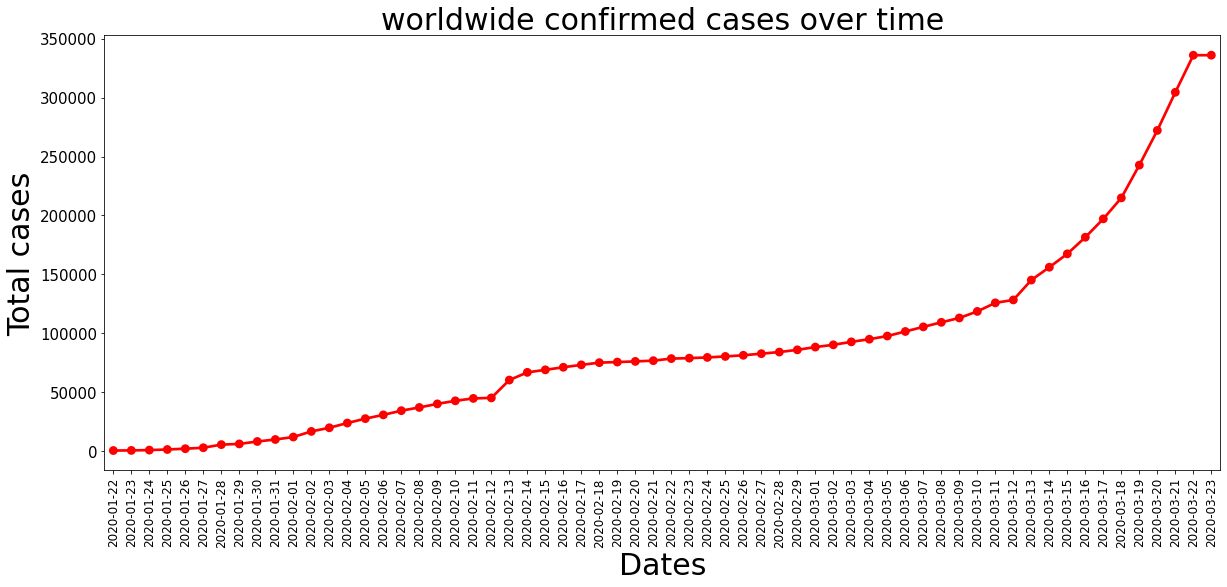

In [32]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("total cases",fontsize=30)
plt.title("worldwide confirmed cases over time",fontsize=30)

ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color="r")
ax.set(xlabel="Dates",ylabel="Total cases")


In [33]:
#current top countries having most active cases
top_actives=top.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives


,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


Plotting the top 20 countries with active cases:

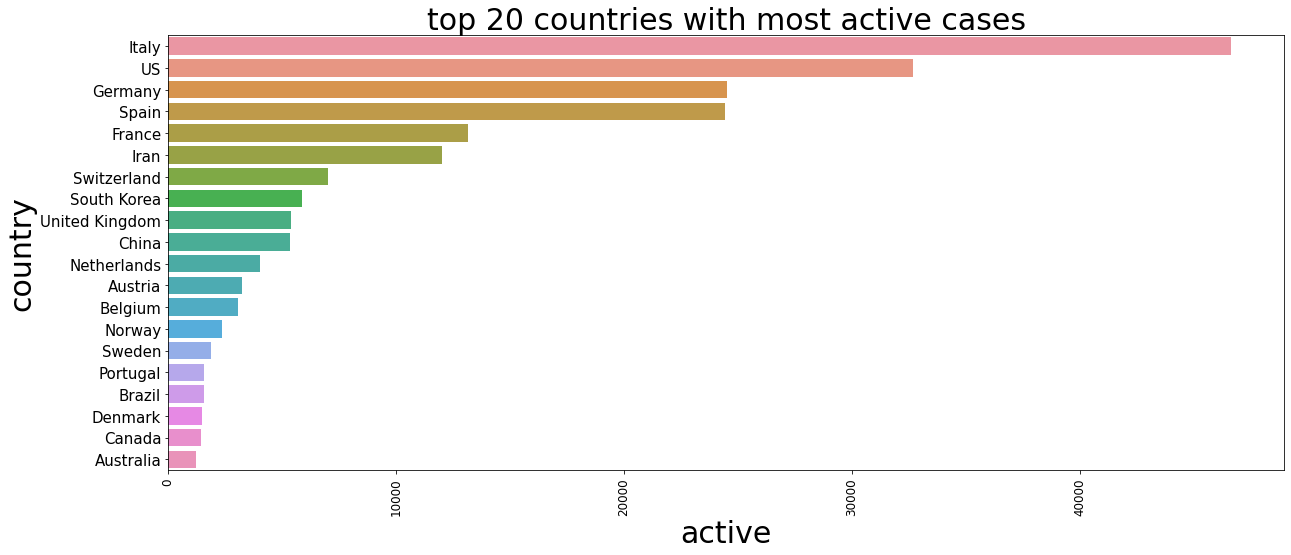

In [34]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("active",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("top 20 countries with most active cases",fontsize=30)

ax=sns.barplot(x=top_actives.active,y=top_actives.country)

In [36]:
china=df[df['country']=='China']
china.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0,399.0
158,Guangdong,China,23.3417,113.4244,2020-01-22,26.0,0.0,0.0,26.0
159,Henan,China,33.8820,113.6140,2020-01-22,5.0,0.0,0.0,5.0
160,Zhejiang,China,29.1832,120.0934,2020-01-22,10.0,0.0,0.0,10.0
161,Hunan,China,27.6104,111.7088,2020-01-22,4.0,0.0,0.0,4.0


In [37]:
china=china.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
china

,date,recovered,deaths,confirmed,active
0,2020-01-22,28.0,17.0,548.0,503.0
1,2020-01-23,30.0,18.0,643.0,595.0
2,2020-01-24,36.0,26.0,920.0,858.0
3,2020-01-25,39.0,42.0,1406.0,1325.0
4,2020-01-26,49.0,56.0,2075.0,1970.0
...,...,...,...,...,...
57,2020-03-19,70535.0,3249.0,81156.0,7372.0
58,2020-03-20,71266.0,3253.0,81250.0,6731.0
59,2020-03-21,71857.0,3259.0,81305.0,6189.0
60,2020-03-22,72362.0,3265.0,81397.0,5770.0


In [38]:
# Data of USA:
US=df[df['country']=='US']
US

,state,country,lat,long,date,confirmed,deaths,recovered,active
98,Washington,US,47.4009,-121.4905,2020-01-22,0.0,0.0,0.0,0.0
99,New York,US,42.1657,-74.9481,2020-01-22,0.0,0.0,0.0,0.0
100,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,0.0,0.0
101,Massachusetts,US,42.2302,-71.5301,2020-01-22,0.0,0.0,0.0,0.0
102,Diamond Princess,US,35.4437,139.6380,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19136,Puerto Rico,US,18.2208,-66.5901,2020-03-23,23.0,1.0,0.0,22.0
19150,Guam,US,13.4443,144.7937,2020-03-23,27.0,1.0,0.0,26.0
19167,Virgin Islands,US,18.3358,-64.8963,2020-03-23,NaN,NaN,NaN,NaN
19210,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,0.0,0.0,6.0


In [39]:
usa=US.groupby(by='date')['confirmed','recovered','deaths','active'].sum().reset_index()
usa

,date,confirmed,recovered,deaths,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
57,2020-03-19,13677.0,0.0,200.0,13477.0
58,2020-03-20,19100.0,0.0,244.0,18856.0
59,2020-03-21,25489.0,0.0,307.0,25182.0
60,2020-03-22,33272.0,0.0,417.0,32855.0


Since first time cases appear in the 33 row ,so i extracted data from 33 row: 

In [42]:
usa.iloc[33:].reset_index().drop('index',axis=1)

,date,confirmed,recovered,deaths,active
0,2020-02-24,36.0,0.0,0.0,36.0
1,2020-02-25,36.0,0.0,0.0,36.0
2,2020-02-26,42.0,0.0,0.0,42.0
3,2020-02-27,42.0,0.0,0.0,42.0
4,2020-02-28,44.0,0.0,0.0,44.0
5,2020-02-29,44.0,0.0,0.0,44.0
6,2020-03-01,44.0,0.0,0.0,44.0
7,2020-03-02,45.0,0.0,0.0,45.0
8,2020-03-03,45.0,0.0,0.0,45.0
9,2020-03-04,45.0,0.0,0.0,45.0


In [45]:
#data for italy
italy=df[df.country=="Italy"]
italy=italy.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop("index",axis=1)
italy

,date,recovered,deaths,confirmed,active
0,2020-01-31,0.0,0.0,2.0,2.0
1,2020-02-01,0.0,0.0,2.0,2.0
2,2020-02-02,0.0,0.0,2.0,2.0
3,2020-02-03,0.0,0.0,2.0,2.0
4,2020-02-04,0.0,0.0,2.0,2.0
5,2020-02-05,0.0,0.0,2.0,2.0
6,2020-02-06,0.0,0.0,2.0,2.0
7,2020-02-07,0.0,0.0,3.0,3.0
8,2020-02-08,0.0,0.0,3.0,3.0
9,2020-02-09,0.0,0.0,3.0,3.0


In [46]:
# Info of Italy data:
italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       53 non-null     datetime64[ns]
 1   recovered  53 non-null     float64       
 2   deaths     53 non-null     float64       
 3   confirmed  53 non-null     float64       
 4   active     53 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


# Now Extracting data for india :


In [47]:
#data for India
india=df[df.country=="India"]
india=india.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india=india.iloc[8:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,2020-01-30,0.0,0.0,1.0,1.0
1,2020-01-31,0.0,0.0,1.0,1.0
2,2020-02-01,0.0,0.0,1.0,1.0
3,2020-02-02,0.0,0.0,2.0,2.0
4,2020-02-03,0.0,0.0,3.0,3.0
5,2020-02-04,0.0,0.0,3.0,3.0
6,2020-02-05,0.0,0.0,3.0,3.0
7,2020-02-06,0.0,0.0,3.0,3.0
8,2020-02-07,0.0,0.0,3.0,3.0
9,2020-02-08,0.0,0.0,3.0,3.0


In [48]:
# Taking a info:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       54 non-null     datetime64[ns]
 1   recovered  54 non-null     float64       
 2   deaths     54 non-null     float64       
 3   confirmed  54 non-null     float64       
 4   active     54 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


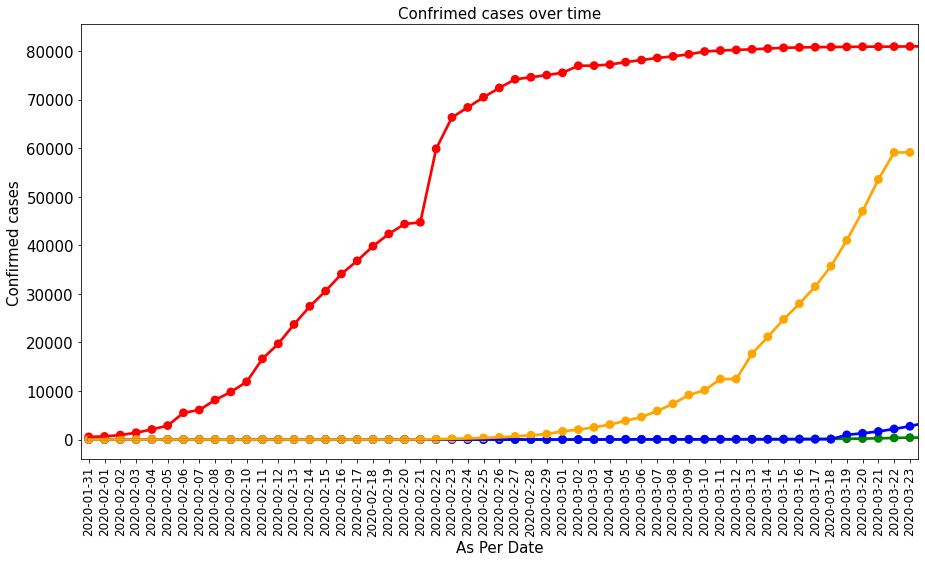

In [51]:
#confirmed
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.confirmed,color="red")
sns.pointplot(india.date.dt.date,india.confirmed,color="green")
sns.pointplot(usa.date.dt.date,usa.confirmed,color="blue")
sns.pointplot(italy.date.dt.date,italy.confirmed,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("As Per Date",fontsize=15)
plt.ylabel("Confirmed cases",fontsize=15)
plt.title("Confrimed cases over time",fontsize=15)
plt.show()

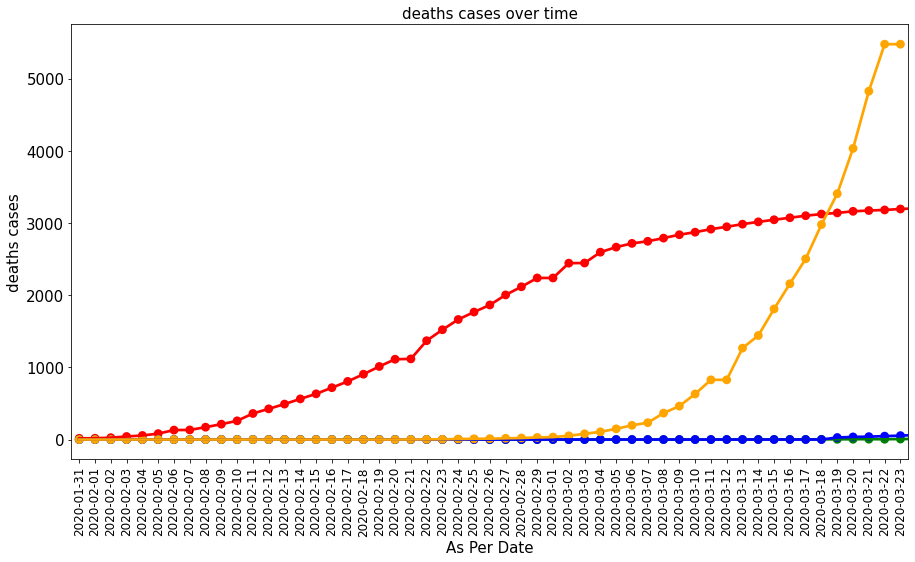

In [52]:
#Deaths
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.deaths,color="red")
sns.pointplot(india.date.dt.date,india.deaths,color="green")
sns.pointplot(usa.date.dt.date,usa.deaths,color="blue")
sns.pointplot(italy.date.dt.date,italy.deaths,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("As Per Date",fontsize=15)
plt.ylabel("deaths cases",fontsize=15)
plt.title("deaths cases over time",fontsize=15)
plt.show()

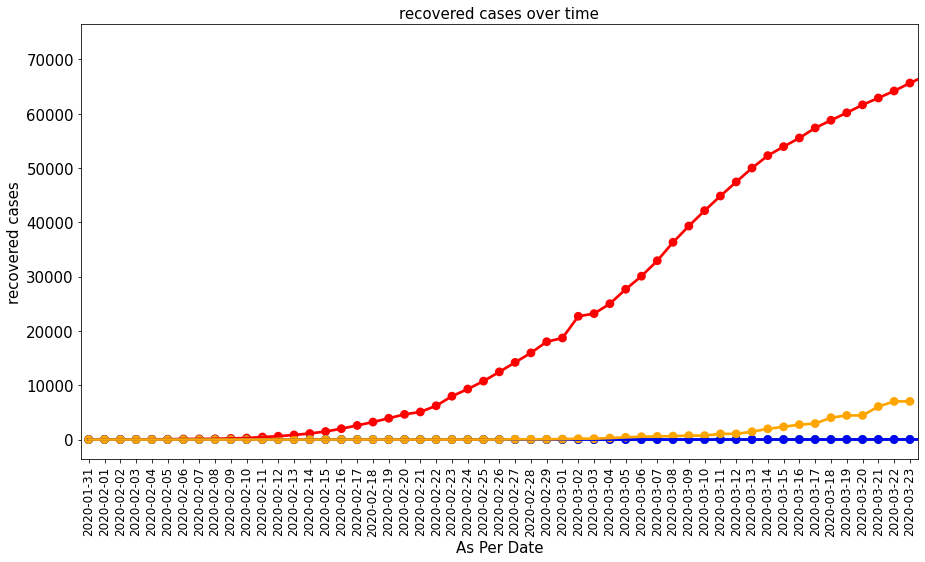

In [53]:
##Recovered
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.recovered,color="red")
sns.pointplot(india.date.dt.date,india.recovered,color="green")
sns.pointplot(usa.date.dt.date,usa.recovered,color="blue")
sns.pointplot(italy.date.dt.date,italy.recovered,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("As Per Date",fontsize=15)
plt.ylabel("recovered cases",fontsize=15)
plt.title("recovered cases over time",fontsize=15)
plt.show()

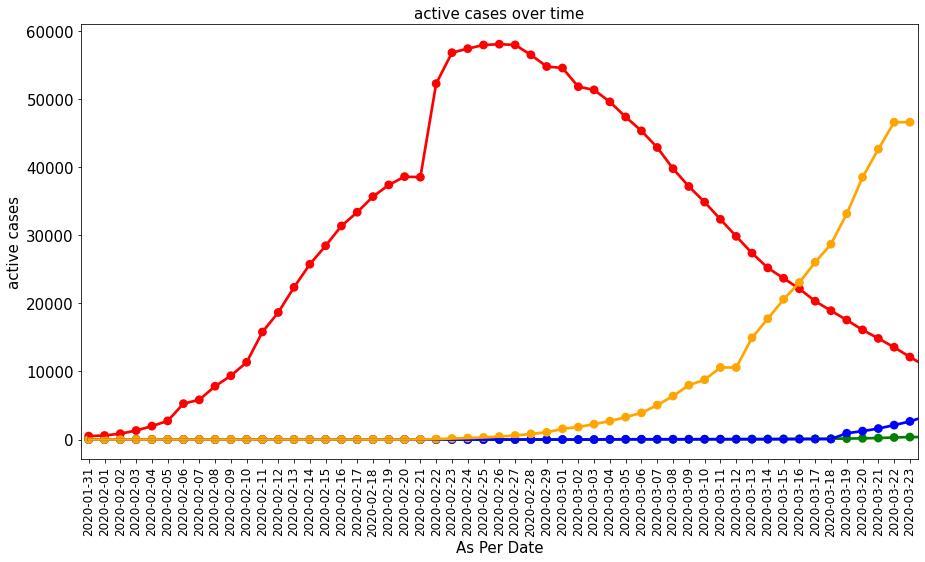

In [54]:
##Active
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.active,color="red")
sns.pointplot(india.date.dt.date,india.active,color="green")
sns.pointplot(usa.date.dt.date,usa.active,color="blue")
sns.pointplot(italy.date.dt.date,italy.active,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("As Per Date",fontsize=15)
plt.ylabel("active cases",fontsize=15)
plt.title("active cases over time",fontsize=15)
plt.show()

# Detailed Analysis of covid cases in India

In [56]:
df_india=pd.read_excel("covid_19_india.xlsx")
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [57]:
# Adding total cases column:

df_india["Total_cases"]=df_india["Total Confirmed cases (Indian National)"]+df_india["Total Confirmed cases ( Foreign National )"]


In [58]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33
5,6,Haryana,14,14,11,0,28
6,7,Himachal Pradesh,3,0,0,1,3
7,8,Karnataka,41,0,3,1,41
8,9,Kerala,101,8,4,0,109
9,10,Madhya Pradesh,9,0,0,0,9


In [59]:
# Adding total active cases column:
df_india["Total active"]=df_india["Total_cases"]-df_india["Death"]-df_india["Cured"]
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,Total active
0,1,Andhra Pradesh,9,0,0,0,9,9
1,2,Bihar,3,0,0,1,3,2
2,3,Chhattisgarh,1,0,0,0,1,1
3,4,Delhi,30,1,6,1,31,24
4,5,Gujarat,32,1,0,1,33,32
5,6,Haryana,14,14,11,0,28,17
6,7,Himachal Pradesh,3,0,0,1,3,2
7,8,Karnataka,41,0,3,1,41,37
8,9,Kerala,101,8,4,0,109,105
9,10,Madhya Pradesh,9,0,0,0,9,9


In [60]:
tot_cases=df_india.groupby("Name of State / UT")["Total active"].sum().sort_values(ascending=False).to_frame()
tot_cases

,Total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [61]:
tot_cases.style.background_gradient(cmap="hot_r")


,Total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


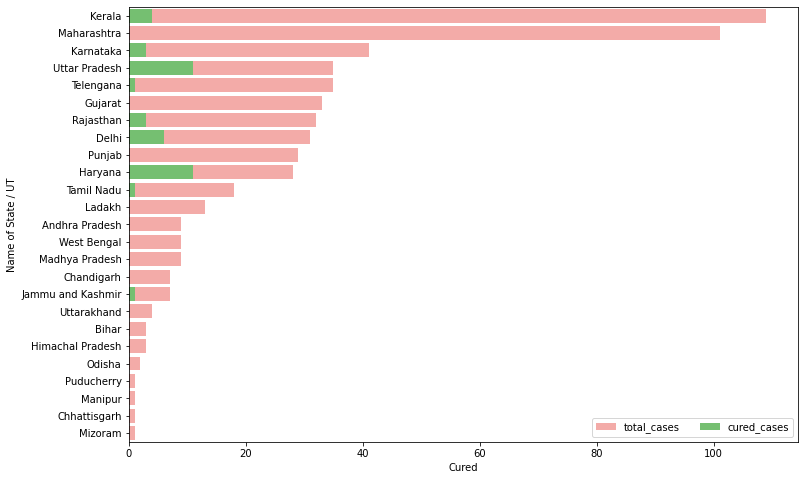

In [62]:
#total_cases and cured
    
f,ax=plt.subplots(figsize=(12,8))
data=df_india[["Name of State / UT","Total_cases","Cured","Death"]]
data.sort_values("Total_cases",ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total_cases",y="Name of State / UT",data=data,label="total_cases",color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured",y="Name of State / UT",data=data,label="cured_cases",color="g")

ax.legend(ncol=2,loc="lower right",frameon=True)


In [67]:
#perday Analysis

dbd_india=pd.read_excel("per_day_cases.xlsx")
dbd_india.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [66]:
# info of data:
dbd_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             56 non-null     datetime64[ns]
 1   Total Cases                      56 non-null     int64         
 2   New Cases                        56 non-null     int64         
 3   Days after surpassing 100 cases  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


In [65]:
#trend of covid cases in india
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_india["Date"],y=dbd_india["Total Cases"],mode="lines+markers",name="Total Cases"))
fig.update_layout(title_text="Trend of Coronavirus cases in India",plot_bgcolor="rgb(230,230,230)")
fig.show()


In [68]:
#Insights into Covid cases Globally
df_confirmed=pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered=pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths=pd.read_csv("time_series_covid19_deaths_global.csv")
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [69]:
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [70]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df_confirmed.rename(columns={"Country/Region":"Country"},inplace=True)
df_recovered.rename(columns={"Country/Region":"Country"},inplace=True)
df_deaths.rename(columns={"Country/Region":"Country"},inplace=True)

In [72]:
df_india_cases=df.query('country== "India"').groupby("date")[["confirmed","deaths","recovered"]].sum().reset_index()
india_confirmed,india_deaths,india_recovered =df_india_cases[["date","confirmed"]],df_india_cases[["date","deaths"]],df_india_cases[["date","recovered"]]


In [73]:
df.groupby("date").sum().head()


,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0,509.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0,604.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0,877.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0,1351.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0,2005.0


In [74]:
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
deaths=df.groupby("date").sum()["deaths"].reset_index()
recovered=df.groupby("date").sum()["recovered"].reset_index()


In [75]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed["date"],y=confirmed["confirmed"],mode="lines+markers",name="confirmed",line=dict(color="blue")))
fig.add_trace(go.Scatter(x=deaths["date"],y=deaths["deaths"],mode="lines+markers",name="deaths",line=dict(color="red")))
fig.add_trace(go.Scatter(x=recovered["date"],y=recovered["recovered"],mode="lines+markers",name="recovered",line=dict(color="green")))
fig.update_layout(title_text="World wide COVID_19 Cases",xaxis_tickfont_size=14,yaxis=dict(title="Number of cases"),plot_bgcolor="rgb(230,230,230)")
fig.show()